In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [128]:
train = pd.read_csv('titanic_train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [130]:
train['Cabin'].isnull().count()

891

<AxesSubplot:>

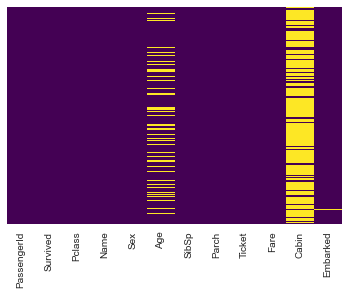

In [131]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

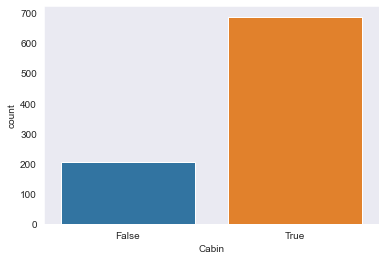

In [132]:
sns.set_style('dark')
sns.countplot(data=train.isnull(),x='Cabin')

<AxesSubplot:xlabel='Survived', ylabel='count'>

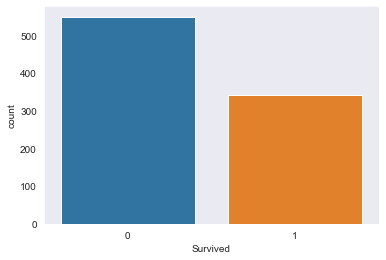

In [133]:
sns.set_style('dark')
sns.countplot(data=train,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

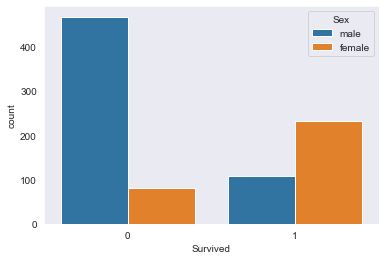

In [134]:
sns.set_style('dark')
sns.countplot(data=train,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

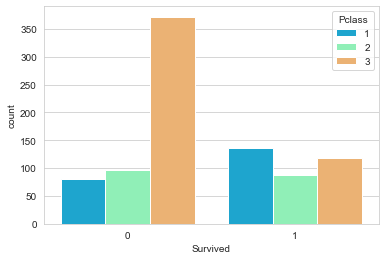

In [135]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Pclass',palette='rainbow')

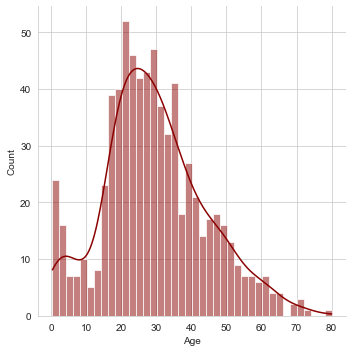

In [136]:
sns.displot(train['Age'].dropna(),kde='False',color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

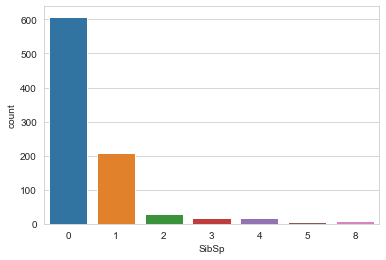

In [137]:
sns.countplot(x='SibSp',data=train)

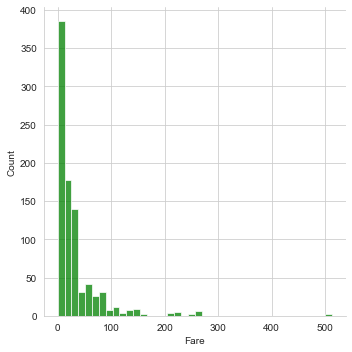

In [138]:
sns.displot(train['Fare'],bins=40,kde=False,color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

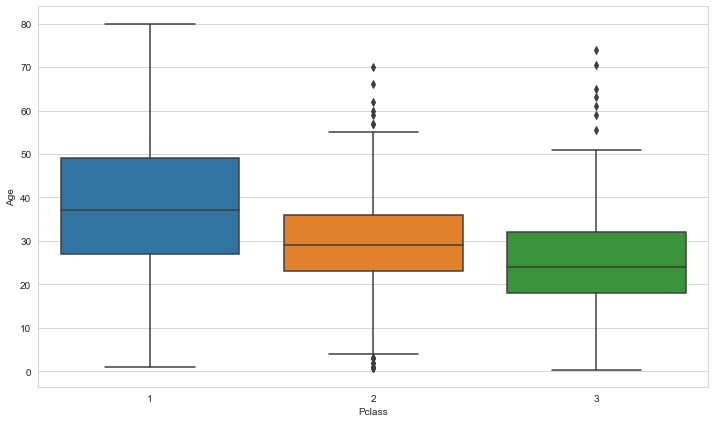

In [139]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [140]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [141]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

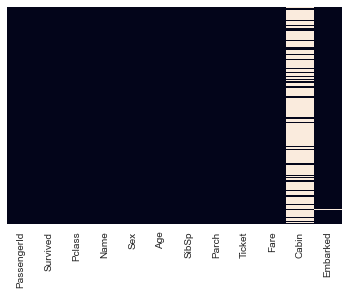

In [142]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False)

In [143]:
pd.get_dummies(train['Embarked'],drop_first=True).head(100)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
95,0,1
96,0,0
97,0,0
98,0,1


In [144]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [145]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [146]:
train = pd.concat([train,sex,embark],axis=1)

In [147]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [148]:
train.drop('Survived',axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [149]:
from sklearn.model_selection import train_test_split

In [156]:
X_train,y_train,X_test,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [157]:
train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [158]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
Logmodel = LogisticRegression()

In [161]:
Logmodel.fit(X_train,y_train)

ValueError: y should be a 1d array, got an array of shape (268, 8) instead.